In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

from generation.dataset.dataset import get_detector_event_df, get_detector_event_signal, get_detector_event_df_path

In [2]:
_DETECTOR = 0
_EVENTS_NUM = 200


detector_signals = np.array([get_detector_event_signal(_DETECTOR, event) 
                    for event in range(_EVENTS_NUM)])

### WGAN

In [3]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

from generation.dataset.dataset_pytorch import SignalsDataset
from generation.train.wgan import run_train, generate_new_signal

In [4]:
SAMPLE_SIZE = 1024

# Train params
NUM_EPOCHS = 1000
BATCH_SIZE = 32
LEARNING_RATE = 1e-4
LATENT_DIM = 32
PRINT_EACH = 50
VERBOSE = 1
NO_SAVE = True

In [5]:
origin_data = detector_signals.copy()
min_values = np.min(origin_data, axis=1)
max_values = np.max(origin_data, axis=1)
data = (origin_data  - min_values[:, None]) / (max_values - min_values)[:, None]
data = data[~np.isnan(data).any(axis=1)]
dataset = SignalsDataset(data)

/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


epoch-0; D_loss: -0.004094700329005718; G_loss: -0.0052452972158789635


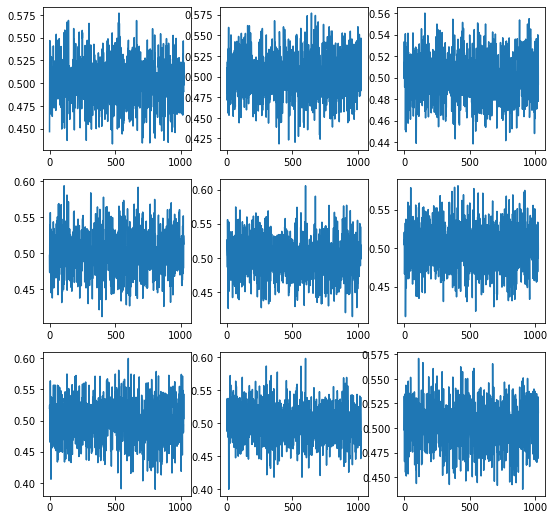

epoch-50; D_loss: -2.289666175842285; G_loss: 2.2087152004241943


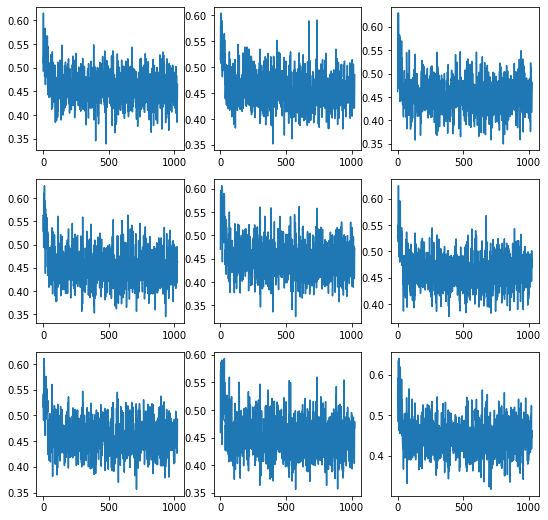

epoch-100; D_loss: -1.7990912199020386; G_loss: 1.5764961242675781


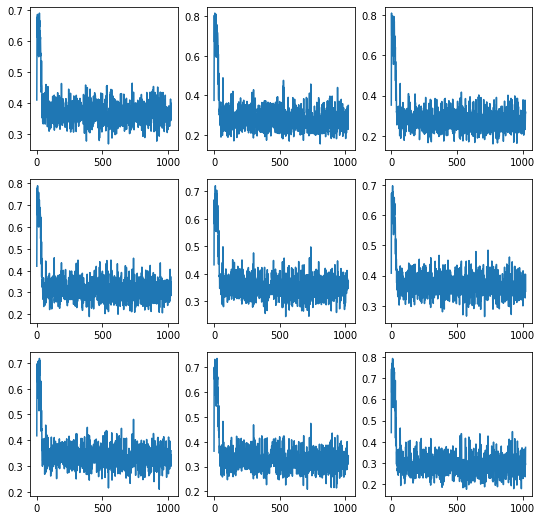

epoch-150; D_loss: -1.0040072202682495; G_loss: 0.7852357625961304


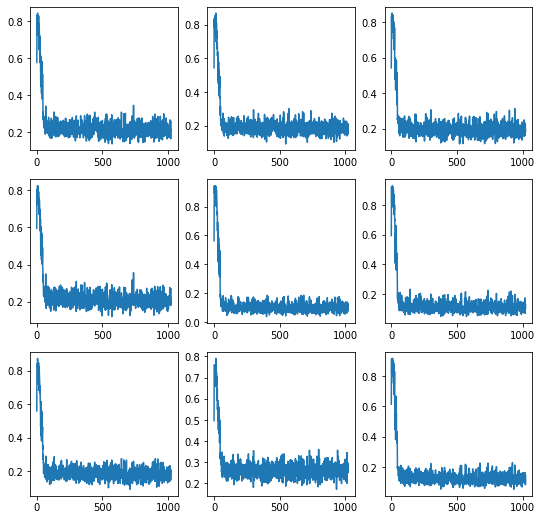

epoch-200; D_loss: -0.5027664303779602; G_loss: 0.22552677989006042


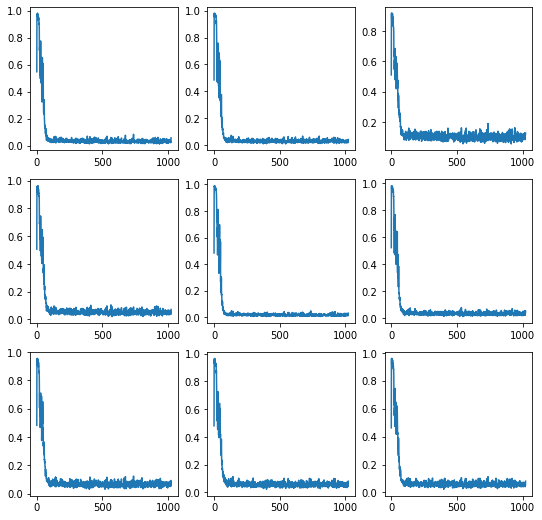

epoch-250; D_loss: -0.2337474524974823; G_loss: 0.13276124000549316


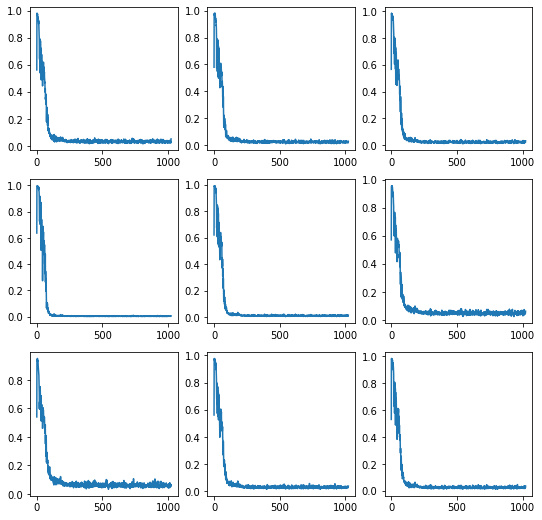

epoch-300; D_loss: -0.11725462973117828; G_loss: 0.0956200361251831


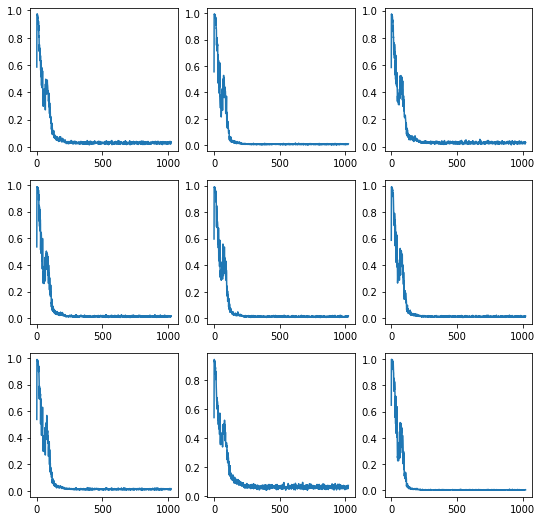

epoch-350; D_loss: -0.1036096066236496; G_loss: 0.0705261081457138


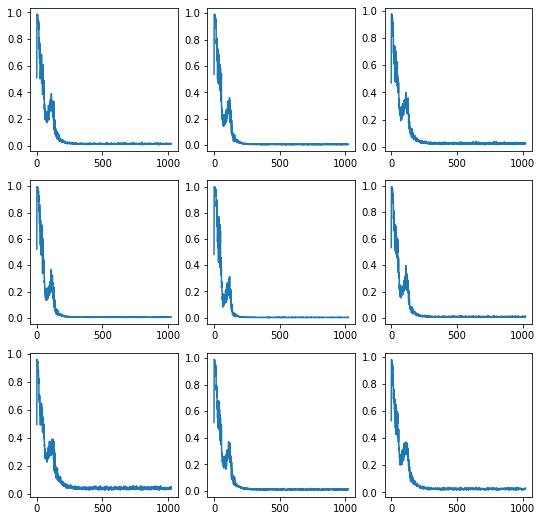

epoch-400; D_loss: -0.11050167679786682; G_loss: 0.07602836191654205


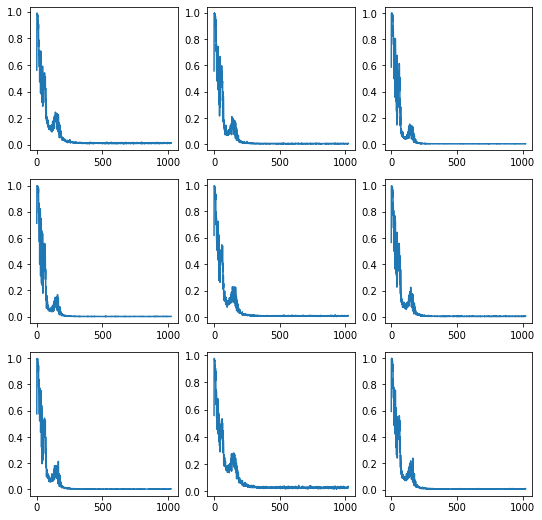

epoch-450; D_loss: -0.08489031344652176; G_loss: 0.05716168135404587


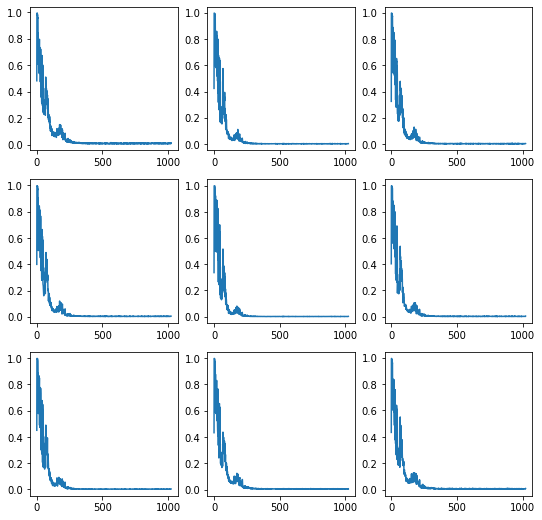

epoch-500; D_loss: -0.0792258158326149; G_loss: 0.05313968285918236


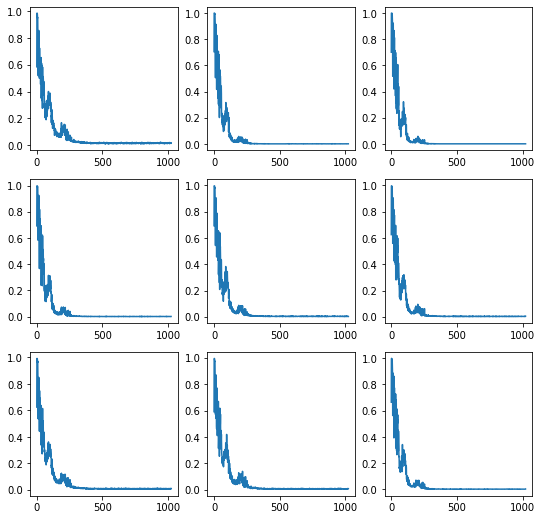

epoch-550; D_loss: -0.10857098549604416; G_loss: 0.06422818452119827


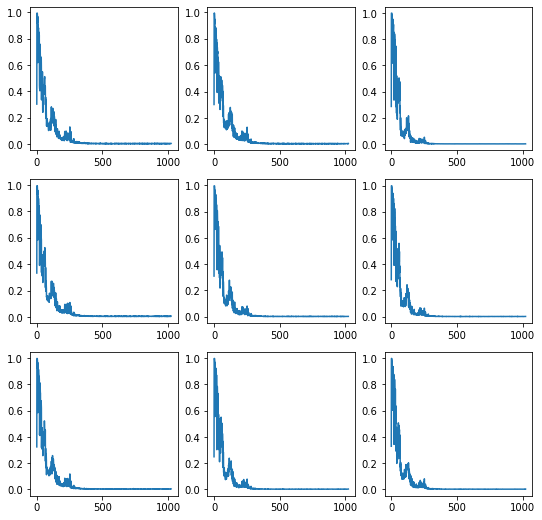

epoch-600; D_loss: -0.07576529681682587; G_loss: 0.06443338096141815


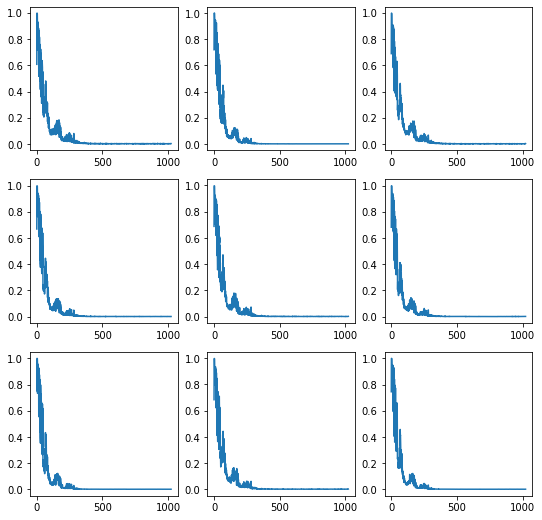

epoch-650; D_loss: -0.07392837107181549; G_loss: 0.06786561757326126


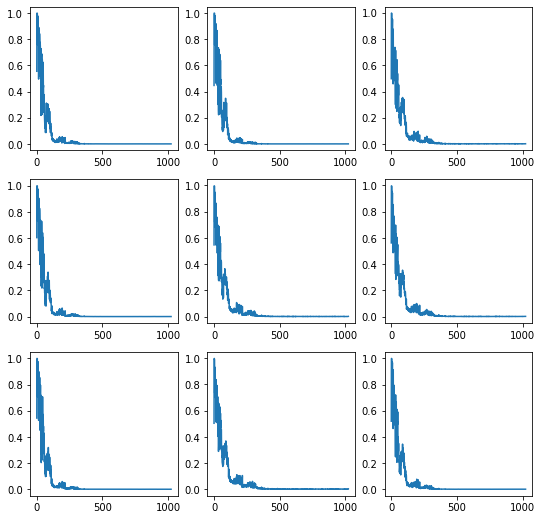

epoch-700; D_loss: -0.0784924328327179; G_loss: 0.06350550800561905


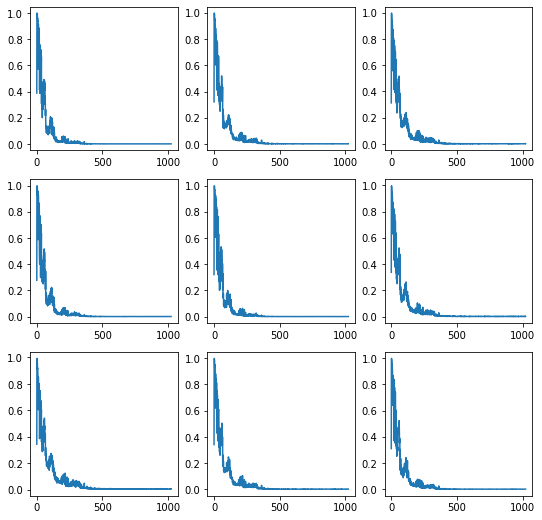

epoch-750; D_loss: -0.061534009873867035; G_loss: 0.052955709397792816


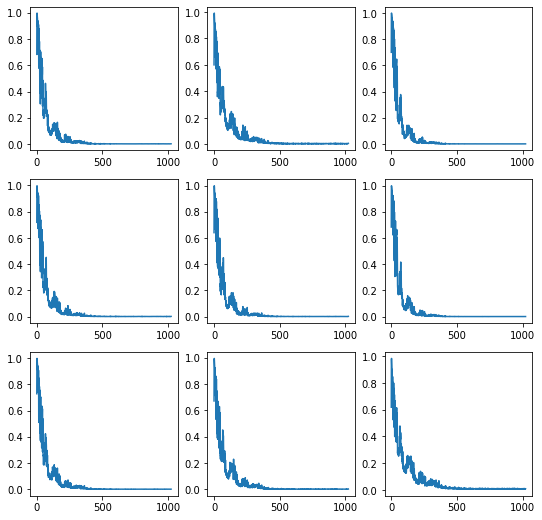

epoch-800; D_loss: -0.0693252831697464; G_loss: 0.0667986050248146


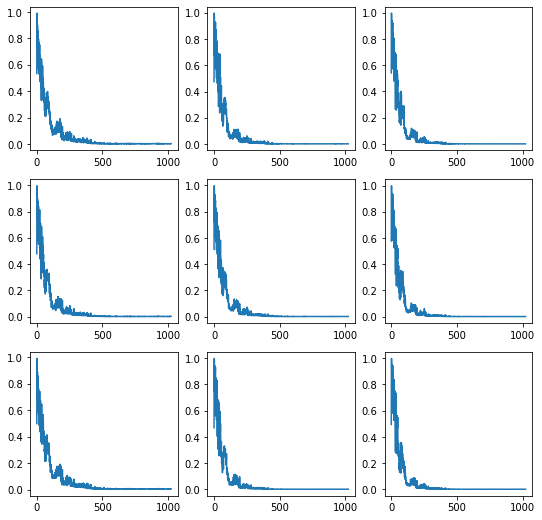

epoch-850; D_loss: -0.0682547464966774; G_loss: 0.061953362077474594


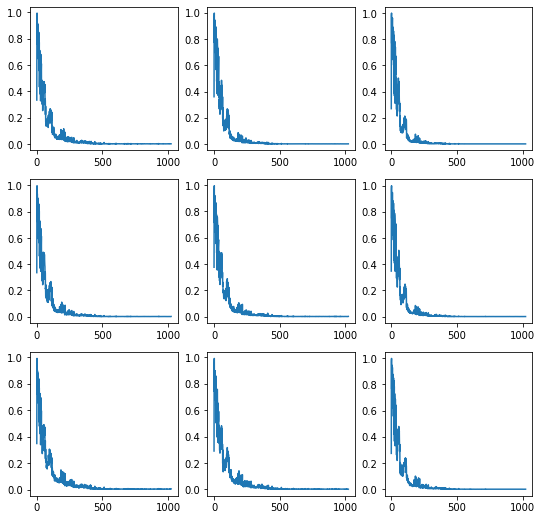

epoch-900; D_loss: -0.06178303062915802; G_loss: 0.04165058583021164


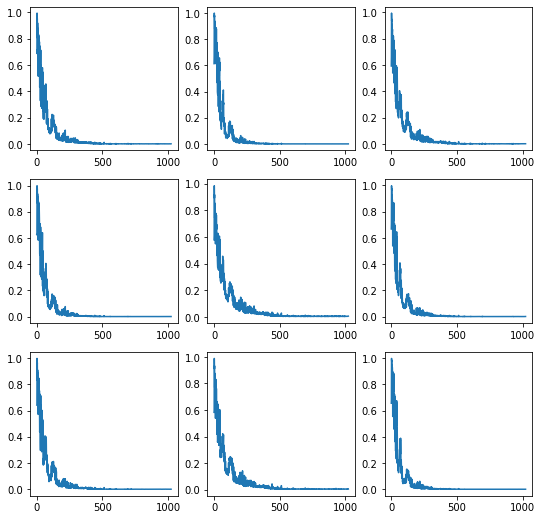

In [ ]:
generator = run_train(dataset, \
          latent_dim=LATENT_DIM, \
          sample_size=SAMPLE_SIZE, \
          learning_rate=LEARNING_RATE, \
          num_epochs=NUM_EPOCHS, \
          batch_size=BATCH_SIZE, \
          print_each=PRINT_EACH, \
          verbose=VERBOSE, \
          no_save=NO_SAVE)

In [ ]:
generated_signals = np.array([generate_new_signal(generator)[0] for i in range(len(data))])

In [ ]:
def get_random_signal(data):
    return data[np.random.choice(range(len(data)))]

In [ ]:
rows_num = 3
cols_num = 3
f, ax = plt.subplots(rows_num, cols_num, figsize=(12, 12))

for i in range(rows_num * cols_num):
    ax[i // rows_num][i % cols_num].plot(get_random_signal(generated_signals), alpha=0.7)
    ax[i // rows_num][i % cols_num].plot(get_random_signal(data), alpha=0.7)
    ax[i // rows_num][i % cols_num].legend(['Generated', 'Origin'])
plt.show()